In [ ]:
##Capítulo 17

Paul J. Deitel and Harvey Deitel. "Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and The Cloud". Pearson (2020)

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
#llamar a la función connect de sqlite3 para conectarnos a la bdd y obtener el objeto Connection
connection = sqlite3.connect('books.db')

In [3]:
print("Connection Successful", connection) #si la conexión es correcta

Connection Successful <sqlite3.Connection object at 0x0000019B4DCEFC40>


In [4]:
cur = connection.cursor() 

In [5]:
# listando las tablas de la bdd
query = ''' SELECT name FROM sqlite_master WHERE type='table' '''
sth = cur.execute(query) 
results = sth.fetchall() 
print(results)

[('sqlite_sequence',), ('authors',), ('titles',), ('author_ISBN',)]


## Tabla authors

La base de datos tiene tres tablas: authors, author_ISBN y titles. La tabla authors almacena todos los autores y tiene tres columnas:

• id: el número de identificación exclusivo del autor. Esta columna entera se define como autoincrementada: para cada fila insertada en la tabla, SQLite aumenta el valor de id en 1 para garantizar que cada fila tenga un valor único. Esta columna es la clave principal de la tabla.

• first: el nombre del autor (una cadena).

• last: el apellido del autor (una cadena).

In [6]:
# listando observaciones de tabla authors
query = ''' SELECT * FROM authors ''' 
sth = cur.execute(query) 
results = sth.fetchall() 
print(results)

[(1, 'Paul', 'Deitel'), (2, 'Harvey', 'Deitel'), (3, 'Abbey', 'Deitel'), (4, 'Dan', 'Quirk'), (5, 'Alexander', 'Wald')]


In [7]:
#Ver el contenido de la tabla authors
#Usemos una consulta SQL y pandas para ver el contenido de la tabla authors
pd.read_sql('SELECT * FROM authors', connection, index_col=['id'])

,first,last
id,,
1,Paul,Deitel
2,Harvey,Deitel
3,Abbey,Deitel
4,Dan,Quirk
5,Alexander,Wald


La función de Pandas read_sql ejecuta una consulta SQL y devuelve un DataFrame que contiene los resultados de la consulta. Los argumentos de la función son:

• una cadena que representa la consulta SQL a ejecutar,

• el objeto Connection de la base de datos SQLite, y en este caso

• un argumento de palabra clave index_col que indica qué columna debe usarse como índices de fila del DataFrame (los valores de identificación del autor en este caso). Cuando no se pasa index_col, los valores de índice que comienzan desde 0 aparecen a la izquierda de las filas del DataFrame.

Una consulta SQL SELECT obtiene filas y columnas de una o más tablas en una base de datos. En la consulta:

SELECT * FROM authors

el asterisco (*) es un comodín que indica que la consulta debe obtener todas las columnas de la tabla authors.

## Tabla titles
La tabla de títulos almacena todos los libros y tiene cuatro columnas:

• isbn: el ISBN del libro (una cadena) es la clave principal de esta tabla. ISBN es una abreviatura de “International Standard Book Number”, que es un esquema de numeración que utilizan los editores para dar a cada libro un número de identificación único.

• title: el título del libro (una cadena).

• edition: el número de edición del libro (un número entero).

• copyright: el año de copyright del libro (una cadena).

In [11]:
pd.read_sql('SELECT * FROM titles', connection, index_col=['isbn'])

,title,edition,copyright
isbn,,,
0135404673,Intro to Python for CS and DS,1,2020
0132151006,Internet & WWW How to Program,5,2012
0134743350,Java How to Program,11,2018
0133976890,C How to Program,8,2016
0133406954,Visual Basic 2012 How to Program,6,2014
0134601548,Visual C# How to Program,6,2017
0136151574,Visual C++ How to Program,2,2008
0134448235,C++ How to Program,10,2017
0134444302,Android How to Program,3,2017


In [12]:
pd.read_sql('SELECT DISTINCT copyright FROM titles', connection)

,copyright
0,2020
1,2012
2,2018
3,2016
4,2014
5,2017
6,2008


In [15]:
pd.read_sql('SELECT COUNT(DISTINCT copyright) CONTEO FROM titles', connection)

,CONTEO
0,7


## Tabla author_ISBN
La tabla author_ISBN utiliza las siguientes columnas para asociar a los autores de la tabla authors con sus libros en la tabla titles:

• id: la identificación de un autor (un número entero).

• isbn: el ISBN del libro (una cadena).

La columna de identificación es una foreign key, que es una columna en esta tabla que coincide con una columna primary key en otra tabla, es decir, la columna de identificación de la tabla authors. La columna isbn también es una foreign key: coincide con la columna de clave primaria isbn de la tabla titles. 

Una base de datos puede tener muchas tablas. Un objetivo al diseñar una base de datos es minimizar la duplicación de datos entre las tablas. Para hacer esto, cada tabla representa una entidad específica y las claves externas (foreign keys) ayudan a vincular los datos de varias tablas. Las claves primarias y las claves externas se designan cuando crea las tablas de la base de datos.

Juntas, las columnas id e isbn de esta tabla forman una clave primaria compuesta. Cada fila de esta tabla hace coincidir de forma única un autor con el ISBN de un libro. Esta tabla contiene muchas entradas, así que usemos SQL y pandas para ver solo las primeras filas:

In [30]:
df = pd.read_sql('SELECT * FROM author_ISBN', connection)

In [32]:
df = pd.read_sql('SELECT COUNT( DISTINCT isbn) FROM author_ISBN', connection)

In [33]:
df.head(15)

,COUNT( DISTINCT isbn)
0,10


##

Existe una relación de uno a muchos entre una clave principal y una clave externa correspondiente: un autor puede escribir muchos libros y, de manera similar, muchos autores pueden escribir un libro. 

Por lo tanto, una clave externa puede aparecer muchas veces en su tabla, pero solo una vez (como clave principal) en otra tabla. 

Por ejemplo, en la base de datos de libros, el ISBN 0134289366 aparece en varias filas author_ISBN porque este libro tiene varios autores, pero aparece solo una vez como clave principal en titles.

Diagrama Entidad - Relación
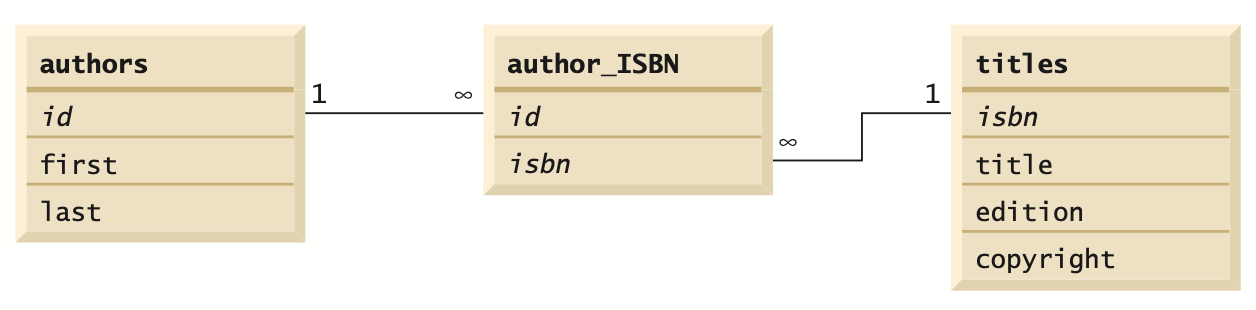

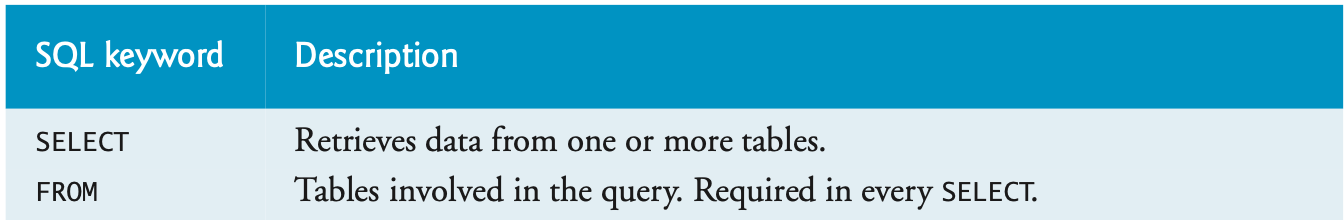
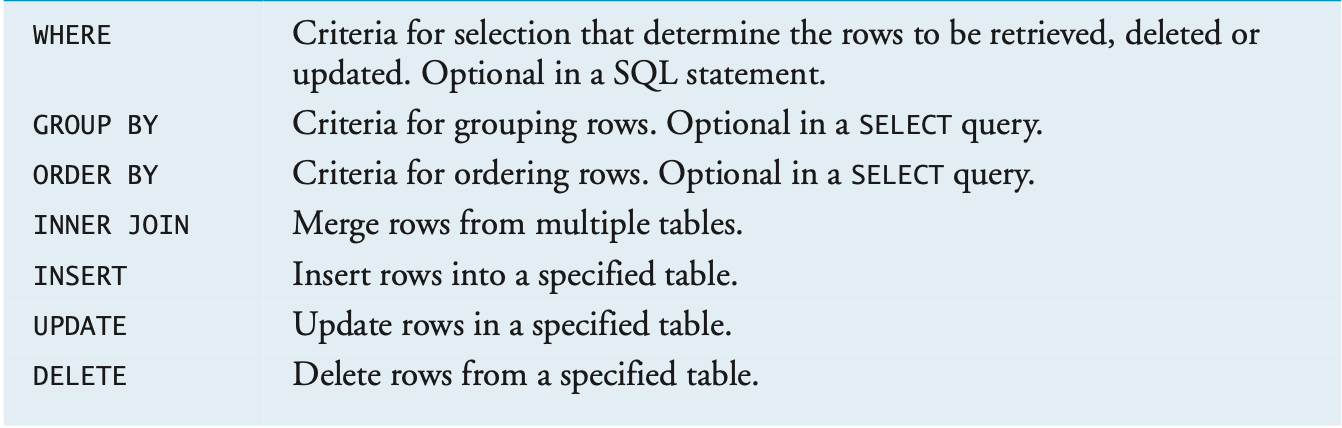

Anteriormente se usó declaraciones SELECT y el carácter * para obtener todas las columnas de una tabla. Por lo general, solo necesita un subconjunto de las columnas, especialmente en big data, donde podría tener docenas, cientos, miles o más columnas. 

Para recuperar solo columnas específicas, coloque una lista de nombres de columna separados por comas. Por ejemplo, recuperemos solo las columnas first y last de la tabla authors:

In [34]:
pd.read_sql('SELECT first, last FROM authors', connection)

,first,last
0,Paul,Deitel
1,Harvey,Deitel
2,Abbey,Deitel
3,Dan,Quirk
4,Alexander,Wald


A menudo, seleccionará filas en una base de datos que satisfagan ciertos criterios de selección, especialmente en big data donde una base de datos puede contener millones o miles de millones de filas. Solo se seleccionan las filas que satisfacen los criterios de selección (formalmente llamados predicados). 

La cláusula WHERE de SQL especifica los criterios de selección de una consulta. Seleccionemos el título, la edición y los derechos de autor para todos los libros con copyright superiores a 2016. 

Los valores de cadena en las consultas SQL están delimitados por comillas simples ('), como en' 2016 ':

In [38]:
pd.read_sql(''' SELECT title, edition, copyright
                FROM titles
                WHERE copyright > '2016' ''', 
            connection)

,title,edition,copyright
0,Intro to Python for CS and DS,1,2020
1,Java How to Program,11,2018
2,Visual C# How to Program,6,2017
3,C++ How to Program,10,2017
4,Android How to Program,3,2017


## Coincidencia de patrones: cero o más caracteres
La cláusula WHERE puede contener los operadores <,>, <=,> =, =, <> (no igual) y LIKE. El operador LIKE se utiliza para la coincidencia de patrones, buscando cadenas que coincidan con un patrón dado. 

Un patrón que contiene el carácter de porcentaje (%) busca cadenas que tengan cero o más caracteres en la posición del carácter de porcentaje en el patrón. Por ejemplo, busquemos todos los autores cuyo apellido comience con la letra D:

In [39]:
pd.read_sql(""" SELECT id, first, last
                FROM authors
                WHERE last LIKE 'D%' """,
           connection, index_col=['id'])

,first,last
id,,
1,Paul,Deitel
2,Harvey,Deitel
3,Abbey,Deitel


## Coincidencia de patrones: un caracter
Un guión bajo (_) en la cadena del patrón indica un único carácter comodín en esa posición. 

Seleccionemos las filas de todos los autores cuyos nombres comiencen con cualquier carácter, seguido de la letra b, seguido de cualquier número de caracteres adicionales (especificado por %):

In [40]:
pd.read_sql(""" SELECT id, first, last
                FROM authors
                WHERE first LIKE '_b%' """, 
            connection, index_col=['id'])

,first,last
id,,
3,Abbey,Deitel


In [41]:
pd.read_sql(""" SELECT id, first, last
                FROM authors
                WHERE first LIKE '%y' """, 
            connection, index_col=['id'])

,first,last
id,,
2,Harvey,Deitel
3,Abbey,Deitel


## Cláusula ORDER BY
La cláusula ORDER BY ordena los resultados de una consulta en orden ascendente (de menor a mayor) o descendente (de mayor a menor), especificado con ASC y DESC, respectivamente. El orden de clasificación predeterminado es ascendente, por lo que ASC es opcional. Ordenemos los títulos en orden descendente:

In [42]:
pd.read_sql('SELECT title FROM titles ORDER BY title DESC',
            connection)

,title
0,Visual C++ How to Program
1,Visual C# How to Program
2,Visual Basic 2012 How to Program
3,Java How to Program
4,Intro to Python for CS and DS
5,Internet & WWW How to Program
6,C++ How to Program
7,C How to Program
8,Android How to Program
9,Android 6 for Programmers


## Ordenar por varias columnas
Para ordenar por varias columnas, especifique una lista separada por comas de nombres de columna después de las palabras clave ORDER BY. Ordenemos los nombres de los autores por apellido y luego por el nombre de los autores que tengan el mismo apellido:

In [43]:
pd.read_sql(""" SELECT id, first, last
                FROM authors
                ORDER BY last, first """,
            connection, index_col=['id'])

,first,last
id,,
3,Abbey,Deitel
2,Harvey,Deitel
1,Paul,Deitel
4,Dan,Quirk
5,Alexander,Wald


El orden puede variar según la columna. Ordenemos a los autores en orden descendente por apellido y en orden ascendente por nombre de cualquier autor que tenga el mismo apellido:

In [44]:
pd.read_sql(""" SELECT id, first, last
                FROM authors
                ORDER BY last DESC, first ASC """,
            connection, index_col=['id'])

,first,last
id,,
5,Alexander,Wald
4,Dan,Quirk
3,Abbey,Deitel
2,Harvey,Deitel
1,Paul,Deitel


## Combinando las cláusulas WHERE y ORDER BY
Las cláusulas WHERE y ORDER BY se pueden combinar en una consulta. 

Obtengamos el isbn, el título, la edición y copyright de cada libro en la tabla de títulos que tiene un título que termina en "How to Program" y pongalos en orden ascendente por título.

In [45]:
pd.read_sql(""" SELECT isbn, title, edition, copyright
                FROM titles
                WHERE title LIKE '%How to Program'
                ORDER BY title """, 
            connection)

,isbn,title,edition,copyright
0,0134444302,Android How to Program,3,2017
1,0133976890,C How to Program,8,2016
2,0134448235,C++ How to Program,10,2017
3,0132151006,Internet & WWW How to Program,5,2012
4,0134743350,Java How to Program,11,2018
5,0133406954,Visual Basic 2012 How to Program,6,2014
6,0134601548,Visual C# How to Program,6,2017
7,0136151574,Visual C++ How to Program,2,2008


## Fusionar datos de varias tablas: INNER JOIN
Recuerde que la tabla author_ISBN de la base de datos de books vincula a los autores con sus títulos correspondientes. Si no separamos esta información en tablas individuales, tendremos que incluir la información del autor con cada entrada en la tabla de títulos. Esto resultaría en el almacenamiento de información de autor duplicada para los autores que escribieron varios libros.

Puede fusionar datos de varias tablas, lo que se denomina unir las tablas, con INNER JOIN. Produzcamos una lista de autores acompañada de los ISBN de los libros escritos por cada autor. Debido a que hay muchos resultados para esta consulta, solo mostramos 15 resultados:

In [46]:
pd.read_sql(""" SELECT first, last, isbn
                FROM authors
                INNER JOIN author_ISBN
                ON authors.id = author_ISBN.id
                ORDER BY last, first """, 
            connection).head(15)

,first,last,isbn
0,Abbey,Deitel,0132151006
1,Abbey,Deitel,0133406954
2,Harvey,Deitel,0134289366
3,Harvey,Deitel,0135404673
4,Harvey,Deitel,0132151006
5,Harvey,Deitel,0134743350
6,Harvey,Deitel,0133976890
7,Harvey,Deitel,0133406954
8,Harvey,Deitel,0134601548
9,Harvey,Deitel,0136151574


La cláusula ON de INNER JOIN usa una columna de clave primaria en una tabla y una columna de clave externa en la otra tabla para determinar qué filas fusionar de cada tabla. 

Esta consulta fusiona las columans first y last de la tabla authors con la columna isbn de la tabla author_ISBN y ordena los resultados en orden ascendente por last y luego first.

Tenga en cuenta la sintaxis authors.id (nombre_tabla.nombre_columna) en la cláusula ON. Esta sintaxis de nombre calificado es necesaria si las columnas tienen el mismo nombre en ambas tablas. Esta sintaxis se puede utilizar en cualquier declaración SQL para distinguir columnas en diferentes tablas que tienen el mismo nombre. En algunos sistemas, los nombres de tablas calificados con el nombre de la base de datos se pueden utilizar para realizar consultas entre bases de datos. Como siempre, la consulta puede contener una cláusula ORDER BY.

In [47]:
pd.read_sql(""" SELECT first, last, title
                FROM authors
                INNER JOIN author_ISBN
                ON authors.id = author_ISBN.id
                INNER JOIN titles
                ON titles.isbn = author_ISBN.isbn
                ORDER BY title """, 
            connection).head(20)

,first,last,title
0,Paul,Deitel,Android 6 for Programmers
1,Harvey,Deitel,Android 6 for Programmers
2,Alexander,Wald,Android 6 for Programmers
3,Paul,Deitel,Android How to Program
4,Harvey,Deitel,Android How to Program
5,Paul,Deitel,C How to Program
6,Harvey,Deitel,C How to Program
7,Paul,Deitel,C++ How to Program
8,Harvey,Deitel,C++ How to Program
9,Paul,Deitel,Internet & WWW How to Program


In [ ]:
pd.read_sql(""" SELECT first, last, title
                FROM authors
                INNER JOIN author_ISBN
                ON authors.id = author_ISBN.id
                INNER JOIN titles
                ON titles.isbn = author_ISBN.isbn
                WHERE first LIKE '%y'
                ORDER BY title """, 
            connection).head(20)

## insert

In [ ]:
#insert
#objeto Cursor de sqlite3, que se obtiene llamando al método cursor() de Connection

# cur = connection.cursor() 
cursor = cur.execute(""" INSERT INTO authors (first, last)
                         VALUES ('Jane', 'Doe') """)

pd.read_sql('SELECT * FROM authors', connection, index_col=['id'])

## NOTA
El método read_sql de pandas en realidad usa un Cursor detrás de escena para ejecutar consultas y acceder a las filas de los resultados.

## update

In [ ]:
#actualice solo las filas en las que el apellido sea 'Doe' y el nombre sea 'Jane'.
cursor = cursor.execute(""" UPDATE authors SET last='Black'
                            WHERE last='Doe' AND first='Jane' """)
 

In [ ]:
#El atributo de rowcount del objeto Cursor contiene un valor entero que representa 
#el número de filas que se modificaron. Si este valor es 0, no se realizaron cambios. Lo siguiente 
#confirma que UPDATE modificó una fila:

cursor.rowcount
 

In [ ]:
pd.read_sql('SELECT * FROM authors', connection, index_col=['id'])

## delete

In [ ]:
cursor = cursor.execute('DELETE FROM authors WHERE id=6')
cursor.rowcount

pd.read_sql('SELECT id, first, last FROM authors', 
            connection, index_col=['id'])

1. Seleccione de la tabla titles todos los títulos y sus números de edición en orden descendente por número de edición. Muestre solo los tres primeros resultados.


2. La palabra clave NOT de SQL invierte el valor de la condición de una cláusula WHERE. Seleccione de la tabla titles todos los títulos que NO terminen con 'How to Program'